In [20]:
from ggplot import *
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

import time

y_column = 'lettr'
x_columns = ['x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
columns = [y_column] + x_columns

# Look at Important Feature
def show_important_features(rf, x_columns):
    importances = rf.feature_importances_
    indices = np.argsort(importances)

    ind=[]
    for i in indices:
        ind.append(x_columns[i])

    import matplotlib.pyplot as plt

    plt.figure(1)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)),ind)
    plt.xlabel('Relative Importance')
    plt.show()


def load_and_prepare_data(training_set_number=16000):
    data = 'data_set/letter-recognition.data'
    df = pd.read_csv(data, names = columns)
    if training_set_number > len(df):
        training_set_number = int(0.75 * len(df))

    letters = np.unique(df.iloc[:, 0])
    labelencoder_df = preprocessing.LabelEncoder()
    df.iloc[:, 0] = labelencoder_df.fit_transform(df.iloc[:, 0])

    train=df.iloc[:training_set_number]
    test=df[training_set_number:]


    x_train = train.iloc[:, 1:].values
    x_test = test.iloc[:, 1:].values
    y_train = train[y_column].values
    y_test = test[y_column].values
    return x_train, x_test, y_train, y_test, letters



def rf_train(x_train, y_train, n_estimators=100):
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(x_train, y_train)
    return rf

def stastistics(rf, x_test, y_test, y_predict):

    disbursed = rf.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, disbursed[:,1], pos_label=2)
    roc_auc = auc(fpr, tpr)
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    # ggplot(df, aes(x='fpr', y='tpr')) + geom_line() + geom_abline(linetype='dashed')
    # print("Roc Curve: {}".format(roc_auc))
    # print("Acuracy: {}".format(accuracy_score(y_test, y_predict)))

    return fpr, tpr, roc_auc, accuracy_score(y_test, y_predict)

def confusion_matrix_plot(y_test, y_predict, letters):

    cnf_matrix = confusion_matrix(y_test, y_predict)        
    df_cm = pd.DataFrame(cnf_matrix, letters,
                      letters)
    sn.set(font_scale=1.0)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 10})# font size
    plt.show()

def load_test(d=0, i=0):
    stastistics_i = {}
    x_train, x_test, y_train, y_test, letters = load_and_prepare_data((i+1)*2*1000)
    stastistics_i['size_training_set'] = len(x_train)
    stastistics_i['size_testing_set'] = len(x_test)
    # Start of Training
    start = time.time()
    rf = rf_train(x_train, y_train, (d+1)*100)
    # End of Training
    end = time.time()
    stastistics_i['training_duration'] = (end - start)
    y_predict = rf.predict(x_test)
    fpr, tpr, roc_auc, accuracy = stastistics(rf, x_test, y_test, y_predict)
    # stastistics_i['fpr'] = fpr
    # stastistics_i['tpr'] = tpr
    stastistics_i['roc_auc'] = roc_auc
    stastistics_i['accuracy'] = accuracy
    import ipdb;ipdb.set_trace()
    print(classification_report(y_test, y_predict))
    return stastistics_i
    
def main():
    global_statistics = []
    stastistics_d = []
    stastistics_d.append(load_test(7,0))
    stastistics_d.append(load_test(6,1))
    stastistics_d.append(load_test(5,2))
    stastistics_d.append(load_test(4,3))
    stastistics_d.append(load_test(3,4))
    stastistics_d.append(load_test(2,5))
    stastistics_d.append(load_test(1,6))
    stastistics_d.append(load_test(0,7))
#     print(stastistics_d)
#     print("\n\n")
    global_statistics.append(stastistics_d)
    # print("Total time training: {}".format(training_duration))
    # confusion_matrix_plot(y_test, y_predict, letters)

    for i in global_statistics:
        print(i)


if __name__ == '__main__':
    main()


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       708
           1       0.74      0.84      0.79       679
           2       0.88      0.91      0.90       656
           3       0.74      0.92      0.82       716
           4       0.89      0.79      0.84       695
           5       0.88      0.82      0.85       709
           6       0.88      0.82      0.85       698
           7       0.76      0.73      0.75       645
           8       0.98      0.87      0.92       677
           9       0.87      0.92      0.89       653
          10       0.82      0.88      0.85       661
          11       0.96      0.87      0.92       698
          12       0.81      0.93      0.86       701
          13       0.93      0.84      0.89       704
          14       0.83      0.86      0.84       681
          15       0.82      0.90      0.86       719
          16       0.82      0.87      0.85       715
          17       0.83    

In [24]:
global_statistics = []
stastistics_d = []
stastistics_d.append(load_test(7,0))
stastistics_d.append(load_test(6,1))
stastistics_d.append(load_test(5,2))
stastistics_d.append(load_test(4,3))
stastistics_d.append(load_test(3,4))
stastistics_d.append(load_test(2,5))
stastistics_d.append(load_test(1,6))
stastistics_d.append(load_test(0,7))
#     print(stastistics_d)
#     print("\n\n")
global_statistics.append(stastistics_d)
# print("Total time training: {}".format(training_duration))
# confusion_matrix_plot(y_test, y_predict, letters)

for i in global_statistics:
    print(i)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       708
           1       0.74      0.85      0.79       679
           2       0.87      0.91      0.89       656
           3       0.73      0.92      0.81       716
           4       0.88      0.79      0.83       695
           5       0.88      0.82      0.85       709
           6       0.88      0.81      0.84       698
           7       0.79      0.73      0.76       645
           8       0.98      0.87      0.93       677
           9       0.87      0.92      0.89       653
          10       0.81      0.87      0.84       661
          11       0.97      0.87      0.92       698
          12       0.81      0.93      0.86       701
          13       0.94      0.84      0.89       704
          14       0.82      0.85      0.84       681
          15       0.82      0.90      0.86       719
          16       0.83      0.87      0.85       715
          17       0.82    

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       245
           1       0.90      0.99      0.94       207
           2       0.98      0.97      0.97       202
           3       0.95      0.98      0.96       251
           4       0.97      0.96      0.96       230
           5       0.94      0.95      0.94       240
           6       0.96      0.97      0.96       235
           7       0.95      0.90      0.93       210
           8       0.98      0.91      0.94       243
           9       0.94      0.95      0.94       216
          10       0.95      0.92      0.94       214
          11       0.99      0.97      0.98       250
          12       0.96      0.99      0.97       224
          13       0.98      0.94      0.96       246
          14       0.95      0.96      0.96       216
          15       0.96      0.94      0.95       246
          16       0.96      0.97      0.96       252
          17       0.94    

[]

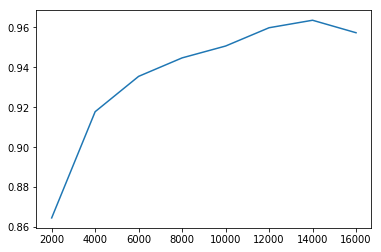

In [26]:
global_statistics=global_statistics[0]
total_accuracys=[]
for i in range(len(global_statistics)):
    total_accuracys.append(global_statistics[i]['accuracy'])
 
total_training_set = []
for i in range(len(global_statistics)):
    total_training_set.append(global_statistics[i]['size_training_set'])

plt.plot(total_training_set, total_accuracys)
plt.plot()

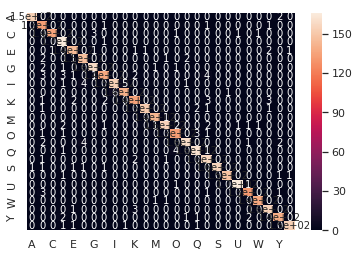

In [27]:
x_train, x_test, y_train, y_test, letters = load_and_prepare_data((16000))
rf = rf_train(x_train, y_train, 300)
y_predict = rf.predict(x_test)
confusion_matrix_plot(y_test, y_predict, letters)

[{'size_testing_set': 10000, 'accuracy': 0.951, 'roc_auc': 0.397018282444473, 'training_duration': 5.8704140186309814, 'size_training_set': 10000}]


[{'size_testing_set': 8000, 'accuracy': 0.96125, 'roc_auc': 0.38778742174967074, 'training_duration': 7.957422733306885, 'size_training_set': 12000}]


[{'size_testing_set': 6000, 'accuracy': 0.9636666666666667, 'roc_auc': 0.39595080584291614, 'training_duration': 10.558408498764038, 'size_training_set': 14000}]


[{'size_testing_set': 4000, 'accuracy': 0.9665, 'roc_auc': 0.40259037376149065, 'training_duration': 13.70776629447937, 'size_training_set': 16000}]


[{'size_testing_set': 2000, 'accuracy': 0.968, 'roc_auc': 0.3824588744588744, 'training_duration': 17.539671421051025, 'size_training_set': 18000}]


[{'size_testing_set': 2000, 'accuracy': 0.966, 'roc_auc': 0.3813922077922078, 'training_duration': 19.491272926330566, 'size_training_set': 18000}]
